<a href="https://colab.research.google.com/github/sanjivyash/SHALA2020/blob/master/ML_L1_Assignment_YashSanjeev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [4]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

Since the classes are imbalanced, I copied the data of the lower frequency class

In [0]:
y = attrition_data.Attrition
X = attrition_data.drop("Attrition", axis = 1)

In [6]:
X.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [7]:
# experimenting the working of different methods
a = pd.get_dummies(X["BusinessTravel"])
a = a.drop("Non-Travel", axis = 1)
b = pd.get_dummies(X["Department"])
pd.concat([b,a],axis=1).head()

,Human Resources,Research & Development,Sales,Travel_Frequently,Travel_Rarely
0,0,0,1,0,1
1,0,1,0,1,0
2,0,1,0,0,1
3,0,1,0,1,0
4,0,1,0,0,1


In [8]:
X["Age"].dtypes

dtype('int64')

In [9]:
isinstance(X["Age"][0], np.int64)

True

In [10]:
for name in X.columns:
    if not (isinstance(X[name][0], np.int64) or isinstance(X[name][0], np.uint8)):
        temp = pd.get_dummies(X[name])
        X = X.drop(name, axis = 1)
        X = pd.concat([X,temp], axis = 1)

X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Female,Male,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,No,Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [11]:
X.dtypes

Age                          int64
DailyRate                    int64
DistanceFromHome             int64
Education                    int64
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
ID                           int64
Non-Travel                   uint8
Travel_Frequently            uint8
Travel_Rarely       

[]

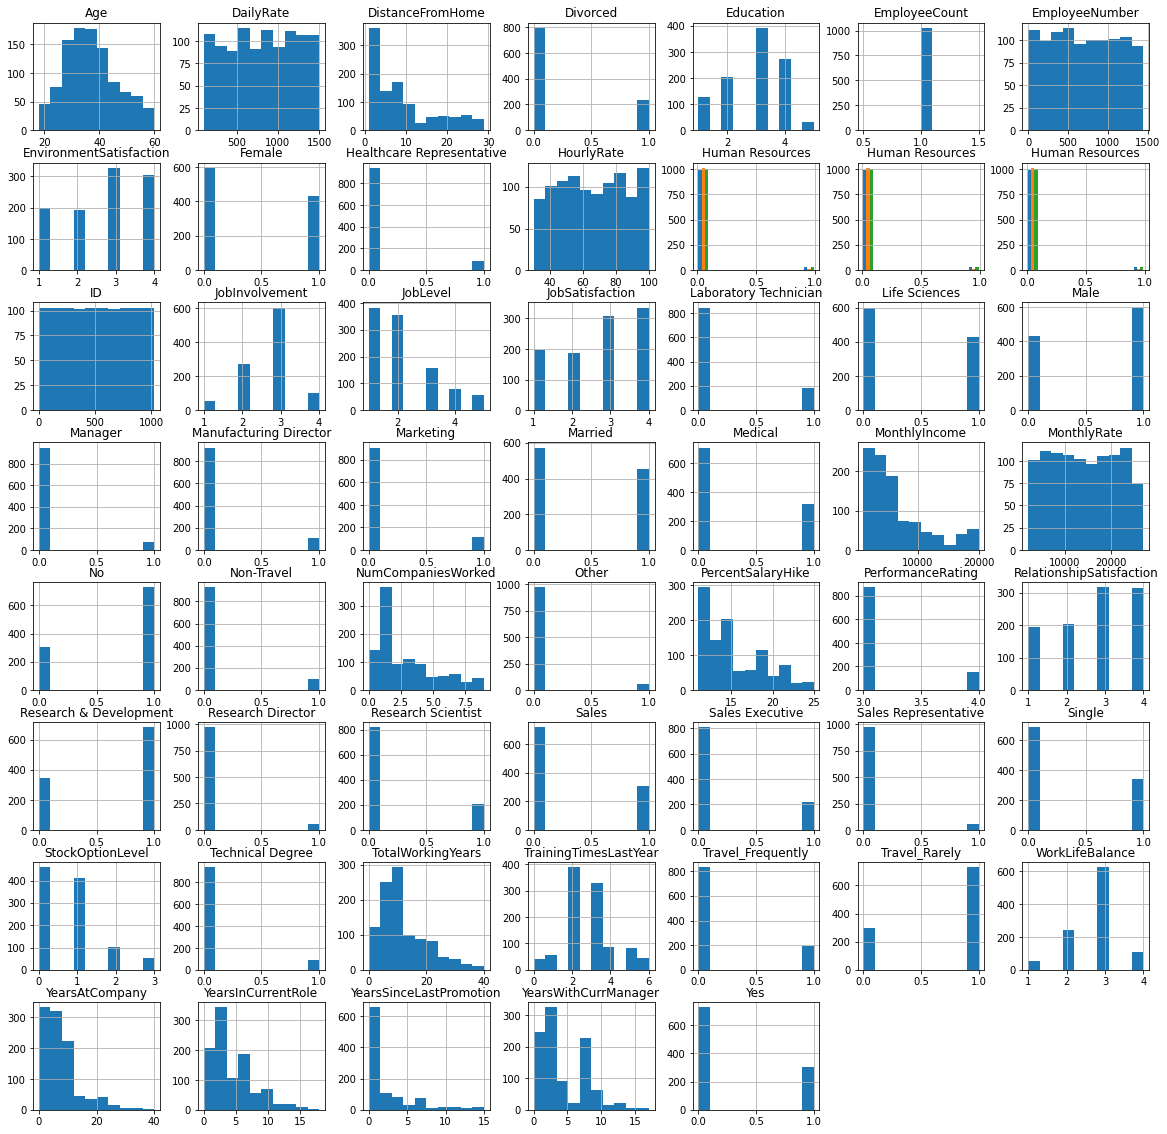

In [12]:
X.hist(figsize = (20,20))
plt.plot()

In [13]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'ID', 'Non-Travel', 'Travel_Frequently',
       'Travel_Rarely', 'Human Resources', 'Research & Development', 'Sales',
       'Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
       'Technical Degree', 'Female', 'Male', 'Healthcare Representative',
       'Human Resources', 'Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'Divorced

In [14]:
X = X.drop(["ID","EmployeeCount","Human Resources"], axis = 1)
for name in X.columns:
        X[name] -= X[name].min()
        X[name] /= X[name].max()

X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree,Female,Male,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,No,Yes
0,0.547619,0.715820,0.000000,0.25,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.000692,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.002075,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.002766,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.004149,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [15]:
y.value_counts()

0    856
1    172
Name: Attrition, dtype: int64

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

In [18]:
rfc_pro = RandomForestClassifier(n_estimators = 30, max_depth = 4)
rfc = CalibratedClassifierCV(rfc_pro)
rfc.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=4,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                  

In [19]:
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)

print("Training Data Stats :") 
print(classification_report(y_train_pred, y_train))
print("Test Data Stats :") 
print(classification_report(y_test_pred, y_test))

Training Data Stats :
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       763
           1       0.37      0.88      0.52        59

    accuracy                           0.88       822
   macro avg       0.68      0.88      0.73       822
weighted avg       0.94      0.88      0.90       822

Test Data Stats :
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       190
           1       0.30      0.56      0.39        16

    accuracy                           0.86       206
   macro avg       0.63      0.73      0.66       206
weighted avg       0.91      0.86      0.88       206



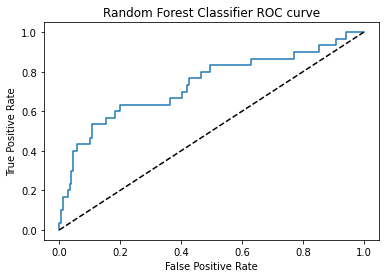

AUC Score : 0.7365530303030303


In [20]:
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC curve')
plt.show()
print("AUC Score :", roc_auc_score(y_test,probs))

In [21]:
lgbm_pro = LGBMClassifier(n_estimators = 40)
lgbm = CalibratedClassifierCV(lgbm_pro, method = 'sigmoid')
lgbm.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=1.0,
                                                     importance_type='split',
                                                     learning_rate=0.1,
                                                     max_depth=-1,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=40, n_jobs=-1,
                                                     num_leaves=31,
                                                     objective=None,
                                                     random_state=None,
                                              

In [22]:
y_test_pred = lgbm.predict(X_test)
y_train_pred = lgbm.predict(X_train)

print("Training Data Stats :") 
print(classification_report(y_train_pred, y_train))
print("Test Data Stats :") 
print(classification_report(y_test_pred, y_test))

Training Data Stats :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       690
           1       0.93      1.00      0.96       132

    accuracy                           0.99       822
   macro avg       0.96      0.99      0.98       822
weighted avg       0.99      0.99      0.99       822

Test Data Stats :
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       191
           1       0.33      0.67      0.44        15

    accuracy                           0.88       206
   macro avg       0.65      0.78      0.69       206
weighted avg       0.93      0.88      0.90       206



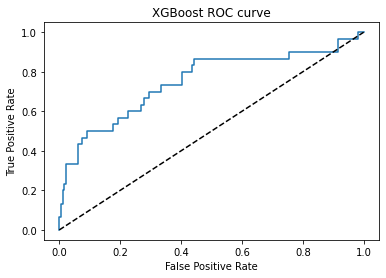

AUC Score : 0.75


In [23]:
probs = lgbm.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
plt.show()
print("AUC Score :", roc_auc_score(y_test,probs))

In [24]:
xgb_pro = XGBClassifier()
xgb = CalibratedClassifierCV(xgb_pro)
xgb.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=3,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=100, n_jobs=1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state=

In [25]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

print("Training Data Stats :") 
print(classification_report(y_train_pred, y_train))
print("Test Data Stats :") 
print(classification_report(y_test_pred, y_test))

Training Data Stats :
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       715
           1       0.75      1.00      0.86       107

    accuracy                           0.96       822
   macro avg       0.88      0.98      0.92       822
weighted avg       0.97      0.96      0.96       822

Test Data Stats :
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       191
           1       0.33      0.67      0.44        15

    accuracy                           0.88       206
   macro avg       0.65      0.78      0.69       206
weighted avg       0.93      0.88      0.90       206



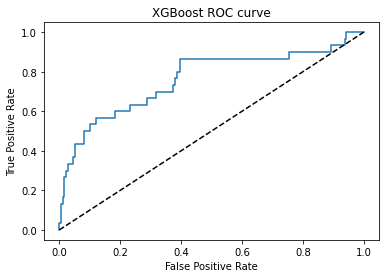

AUC Score : 0.7617424242424242


In [26]:
probs = xgb.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
plt.show()
print("AUC Score :", roc_auc_score(y_test,probs))

In [27]:
svm_pro = SVC(kernel = 'rbf')
svm = CalibratedClassifierCV(svm_pro)
svm.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, break_ties=False,
                                          cache_size=200, class_weight=None,
                                          coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='scale', kernel='rbf',
                                          max_iter=-1, probability=False,
                                          random_state=None, shrinking=True,
                                          tol=0.001, verbose=False),
                       cv=None, method='sigmoid')

In [28]:
y_test_pred = svm.predict(X_test)
y_train_pred = svm.predict(X_train)

print("Training Data Stats :") 
print(classification_report(y_train_pred, y_train))
print("Test Data Stats :") 
print(classification_report(y_test_pred, y_test))

Training Data Stats :
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       741
           1       0.55      0.96      0.70        81

    accuracy                           0.92       822
   macro avg       0.77      0.94      0.83       822
weighted avg       0.95      0.92      0.93       822

Test Data Stats :
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       195
           1       0.30      0.82      0.44        11

    accuracy                           0.89       206
   macro avg       0.64      0.86      0.69       206
weighted avg       0.95      0.89      0.91       206



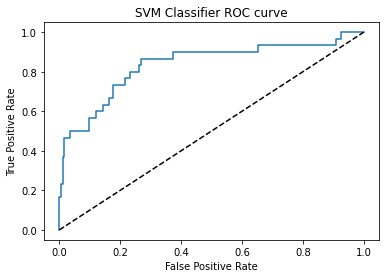

AUC Score : 0.834848484848485


In [29]:
probs = svm.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Classifier ROC curve')
plt.show()
print("AUC Score :", roc_auc_score(y_test,probs))

In [30]:
svm_pro1 = SVC(kernel = 'poly')
svm1 = CalibratedClassifierCV(svm_pro1)
svm1.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, break_ties=False,
                                          cache_size=200, class_weight=None,
                                          coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='scale',
                                          kernel='poly', max_iter=-1,
                                          probability=False, random_state=None,
                                          shrinking=True, tol=0.001,
                                          verbose=False),
                       cv=None, method='sigmoid')

In [31]:
y_test_pred1 = svm1.predict(X_test)
y_train_pred1 = svm1.predict(X_train)

print("Training Data Stats :") 
print(classification_report(y_train_pred1, y_train))
print("Test Data Stats :") 
print(classification_report(y_test_pred1, y_test))

Training Data Stats :
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       741
           1       0.57      1.00      0.73        81

    accuracy                           0.93       822
   macro avg       0.79      0.96      0.84       822
weighted avg       0.96      0.93      0.93       822

Test Data Stats :
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       197
           1       0.23      0.78      0.36         9

    accuracy                           0.88       206
   macro avg       0.61      0.83      0.65       206
weighted avg       0.96      0.88      0.91       206



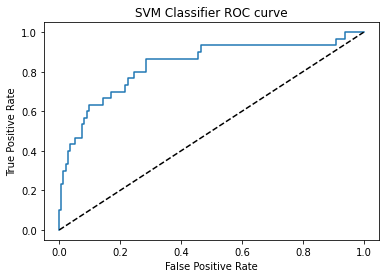

AUC Score : 0.834659090909091


In [32]:
probs = svm1.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Classifier ROC curve')
plt.show()
print("AUC Score :", roc_auc_score(y_test,probs))

In [33]:
knn_pro = KNeighborsClassifier()
knn = CalibratedClassifierCV(knn_pro)
knn.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=None,
                                                           n_neighbors=5, p=2,
                                                           weights='uniform'),
                       cv=None, method='sigmoid')

In [34]:
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

print("Training Data Stats :") 
print(classification_report(y_train_pred, y_train))
print("Test Data Stats :") 
print(classification_report(y_test_pred, y_test))

Training Data Stats :
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       791
           1       0.20      0.90      0.32        31

    accuracy                           0.86       822
   macro avg       0.60      0.88      0.62       822
weighted avg       0.97      0.86      0.90       822

Test Data Stats :
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       200
           1       0.13      0.67      0.22         6

    accuracy                           0.86       206
   macro avg       0.56      0.77      0.57       206
weighted avg       0.96      0.86      0.91       206



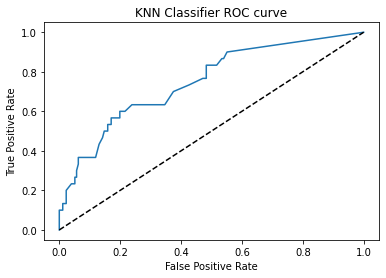

AUC Score : 0.7486742424242424


In [35]:
probs = knn.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier ROC curve')
plt.show()
print("AUC Score :", roc_auc_score(y_test,probs))

In [36]:
log_pro = LogisticRegression()
log_reg = CalibratedClassifierCV(log_pro)
log_reg.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0,
                                                         class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                              

In [37]:
y_test_pred = log_reg.predict(X_test)
y_train_pred = log_reg.predict(X_train)

print("Training Data Stats :") 
print(classification_report(y_train_pred, y_train))
print("Test Data Stats :") 
print(classification_report(y_test_pred, y_test))

Training Data Stats :
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       754
           1       0.39      0.81      0.52        68

    accuracy                           0.88       822
   macro avg       0.68      0.85      0.73       822
weighted avg       0.93      0.88      0.90       822

Test Data Stats :
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       187
           1       0.40      0.63      0.49        19

    accuracy                           0.88       206
   macro avg       0.68      0.77      0.71       206
weighted avg       0.91      0.88      0.89       206



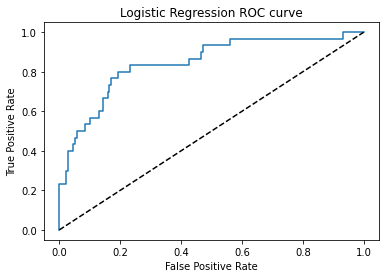

AUC Score : 0.8445075757575758


In [38]:
probs = log_reg.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()
print("AUC Score :", roc_auc_score(y_test,probs))

Looking at the AUC scores, the best classifier among the ones I trained is the Logistoc Regression Model which has an accuracy of approximately $88\%$.

# K-Fold Validation Section

In [0]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
k_fold = KFold(n_splits = 10)
sk_fold = StratifiedKFold(n_splits = 10)

In [40]:
knn = KNeighborsClassifier()
result = cross_val_score(knn, X, y, cv = sk_fold)
print("Accuracy :", result.mean())

Accuracy : 0.8433466590519701


In [41]:
xgb = XGBClassifier(n_estimators = 40)
result = cross_val_score(xgb, X, y, cv = sk_fold)
print("Accuracy :", result.mean())

Accuracy : 0.8472301541976013


In [42]:
lgbm = LGBMClassifier(n_estimators = 60)
result = cross_val_score(lgbm, X, y, cv = sk_fold)
print("Accuracy :", result.mean())

Accuracy : 0.853064915286503


In [43]:
svm = SVC()
result = cross_val_score(svm, X, y, cv = sk_fold)
print("Accuracy :", result.mean())

Accuracy : 0.8560536836093661


In [44]:
svmp = SVC(kernel = 'poly')
result = cross_val_score(svmp, X, y, cv = sk_fold)
print("Accuracy :", result.mean())

Accuracy : 0.8501237388159147


In [45]:
log_reg = LogisticRegression()
result = cross_val_score(log_reg, X, y, cv = sk_fold)
print("Accuracy :", result.mean())

Accuracy : 0.8686369693508471


In [46]:
rfc = RandomForestClassifier(n_estimators = 60)
result = cross_val_score(log_reg, X, y, cv = sk_fold)
print("Accuracy :", result.mean())

Accuracy : 0.8686369693508471


In [0]:
from sklearn.neural_network import MLPClassifier

In [48]:
nn = MLPClassifier(max_iter = 1500, activation = 'tanh')
result = cross_val_score(nn, X, y, cv = sk_fold)
print("Accuracy :", result.mean())

Accuracy : 0.8462307252998287


In [49]:
nn = MLPClassifier(hidden_layer_sizes = (50,40,30), max_iter = 1200)
result = cross_val_score(nn, X, y, cv = sk_fold)
print("Accuracy :", result.mean())

Accuracy : 0.8277460498762611


In [50]:
print("Trivial Accuracy :", (y == 0).mean())

Trivial Accuracy : 0.8326848249027238


# Conclusion
The K-Fold Validation gives a low validation score as compared to train test split method, and possibly a more realistic measure of the model performance on test data

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  